In [3]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier

from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")

In [64]:
auc_0 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_13/auc/auc.npy')

In [3]:
auc_1 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_1/auc/auc.npy')

In [4]:
auc_2 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_2/auc/auc.npy')

In [6]:
auc_3 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_3/auc/auc.npy')

In [7]:
auc_4 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_4/auc/auc.npy')

In [65]:
max_0 = np.max(auc_0.T[1])
idx_0 = np.where(auc_0.T==np.max(auc_0.T[1]))[1][-1]
# max_1 = np.max(auc_1.T[1])
# idx_1 = np.where(auc_1.T==np.max(auc_1.T[1]))[1][-1]
# max_2 = np.max(auc_2.T[1])
# idx_2 = np.where(auc_2.T == np.max(auc_2.T[1]))[1][-1]
# max_3 = np.max(auc_3.T[1])
# idx_3 = np.where(auc_3.T == np.max(auc_3.T[1]))[1][-1]
# max_4 = np.max(auc_4.T[1])
# idx_4 = np.where(auc_4.T == np.max(auc_4.T[1]))[1][-1]

In [66]:
print max_0
print idx_0

0.974162459373
28


model_0 max auc: 0.974162459373  model_0 index: 28


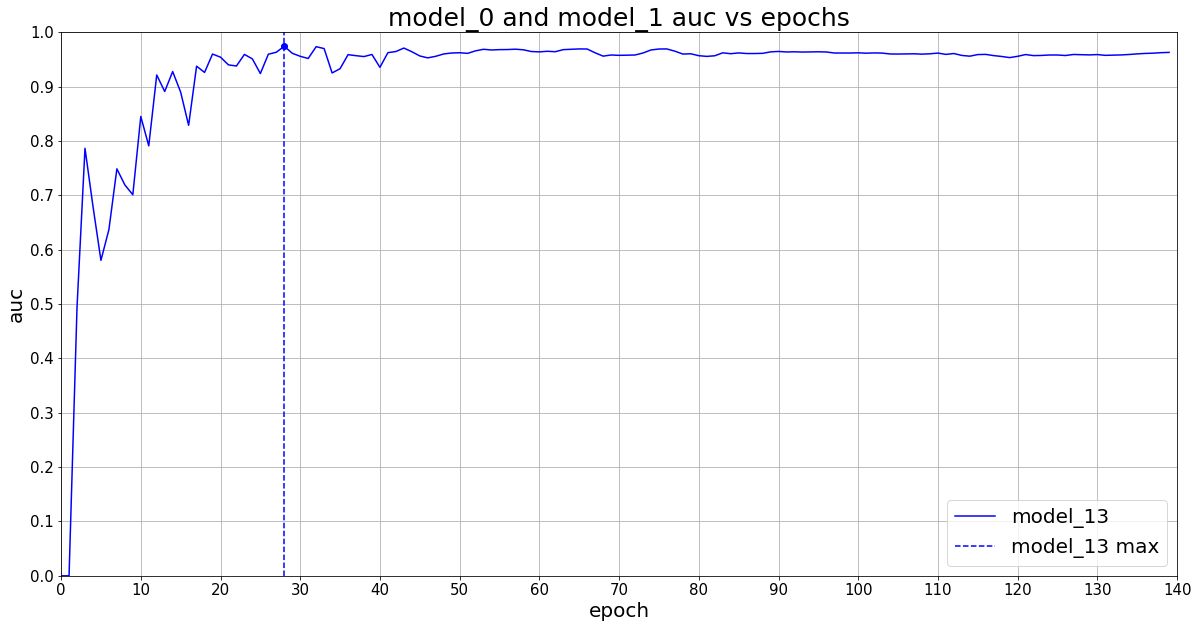

In [69]:
print 'model_0 max auc: ' + str(max_0), ' model_0 index: ' + str(idx_0)
# print 'model_1 max auc: ' + str(max_1), ' model_1 index: ' + str(idx_1)
# print 'model_2 max auc: ' + str(max_2), ' model_2 index: ' + str(idx_2)
# print 'model_3 max auc: ' + str(max_3), ' model_3 index: ' + str(idx_3)
# print 'model_4 max auc: ' + str(max_4), ' model_4 index: ' + str(idx_4)




plt.figure(figsize = (20,10))
plt.plot(auc_0.T[0],auc_0.T[1], color = 'blue')
# plt.plot(auc_1.T[0],auc_1.T[1], color = 'red')
# plt.plot(auc_2.T[0],auc_2.T[1], color = 'green')
# plt.plot(auc_3.T[0],auc_3.T[1], color = 'orange')
# plt.plot(auc_4.T[0],auc_4.T[1], color = 'purple')

plt.plot([idx_0,idx_0],[0,1], color = 'blue', linestyle = '--')
# plt.plot([idx_1,idx_1],[0,1], color = 'red', linestyle = '--')
# plt.plot([idx_2,idx_2],[0,1], color = 'green', linestyle = '--')
# plt.plot([idx_3,idx_3],[0,1], color = 'orange', linestyle = '--')
# plt.plot([idx_4,idx_4],[0,1], color = 'purple', linestyle = '--')

plt.scatter([idx_0],[max_0], color = 'blue')
# plt.scatter([idx_1],[max_1], color = 'red')
# plt.scatter([idx_2],[max_2], color = 'green')
# plt.scatter([idx_3],[max_3], color = 'orange')
# plt.scatter([idx_4],[max_4], color = 'purple')


plt.xlim([0,140])
plt.ylim([0,1])
plt.xticks((np.linspace(0,140,15)),fontsize=15)
plt.yticks((np.linspace(0,1,11)),fontsize=15)
# plt.ylim([0.7,1.005])
plt.title('model_0 and model_1 auc vs epochs', fontsize = 25)
plt.legend(('model_13', 'model_13 max'),fontsize = 20)#, 'model_1', 'model_2', 'model_3', 'model_4'),loc = 'upper left',fontsize = 'xx-large')
plt.xlabel('epoch', fontsize = 20)
plt.ylabel('auc', fontsize = 20)
# plt.xlim([80,180])
plt.grid(True)


In [27]:
avg_120 = np.average((auc_1.T[1][:120],auc_0.T[1],auc_2.T[1][:120],auc_3.T[1][:120],auc_4.T[1][:120]),axis = 0)
std_120 = np.std((auc_1.T[1][:120],auc_0.T[1],auc_2.T[1][:120],auc_3.T[1][:120],auc_4.T[1][:120]),axis = 0)

avg_180 = np.average((auc_1.T[1][:180],auc_2.T[1][:180],auc_3.T[1][:180],auc_4.T[1][:180]),axis = 0)
std_180 = np.std((auc_1.T[1][:180],auc_2.T[1][:180],auc_3.T[1][:180],auc_4.T[1][:180]),axis = 0)


avg = np.concatenate((avg_120,avg_180[120:])).reshape(-1,)
std = np.concatenate((std_120,std_180[120:])).reshape(-1,)


In [28]:
max_avg = np.max(avg)
idx_avg = np.where(avg == max_avg)[0]

avg at 120 epochs: 0.875000014901
max of avg auc: 0.916666671634  model_3 index: 135


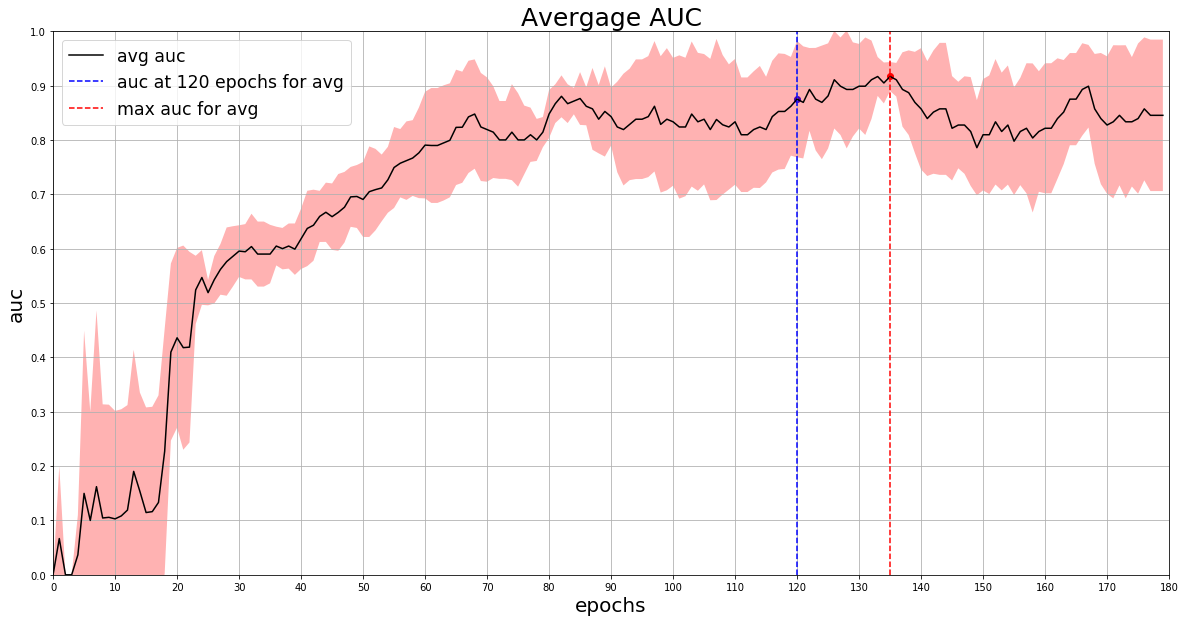

In [31]:
print 'avg at 120 epochs: ' + str(avg[120])
print 'max of avg auc: ' + str(max_avg), ' model_3 index: ' + str(idx_avg[0])
plt.figure(figsize = (20,10))
plt.plot(auc_1.T[0],avg, color = 'black')
plt.plot([120,120],[0,1], color = 'blue', linestyle = '--')
plt.plot([idx_avg,idx_avg],[0,1], color = 'red', linestyle = '--')
plt.scatter([120],[avg[120]],color = 'blue')
plt.scatter([idx_avg],[max_avg],color = 'red')
plt.legend(('avg auc','auc at 120 epochs for avg','max auc for avg'),loc = 'upper left',fontsize = 'xx-large')
plt.title('Avergage AUC', fontsize = 25)
plt.xlabel('epochs', fontsize = 20)
plt.ylabel('auc', fontsize = 20)
plt.grid(True)
plt.xlim([0,180])
plt.ylim([0,1])
plt.xticks(np.linspace(0,180,19))
plt.yticks(np.linspace(0,1,11))
plt.fill_between(auc_1.T[0], avg+std, avg-std, facecolor = 'red', alpha =0.3)
plt.show()

In [241]:
print 'max auc: ' + str(np.max(auc_0.T[1])), ' index: ' + str(int(np.where(auc_0.T==np.max(auc_0.T[1]))[1]))

max auc: 0.973809480667  index: 107


In [242]:
print 'model_1 max auc: ' + str(np.max(auc_1.T[1])), ' model_1 index: ' + str(np.where(auc_1.T==np.max(auc_1.T[1]))[1][-1])



model_1 max auc: 0.952380955219  model_1 index: 138
